# Grocery Store System Recommendation / Sistema de Recomendación para una tienda de abarrotes usando un modelo de reglas de asociación****

### Author: Gustavo t.g
### Filename: Greocery Store System Recommendation
### Creation Date : 24/01/2021

## 1.- Loading libraries and data

In [1]:
#all lines with this "#" symbol is a comment, the rest are code lines
library("arules")
#abarrotes=Grocery Store.csv
abarrote<-read.transactions("../input/grocery-store-data/Grocery Store.csv", sep=",")


Loading required package: Matrix


Attaching package: ‘arules’


The following objects are masked from ‘package:base’:

    abbreviate, write




## 2.- preparing data

In [2]:
#basic information about abarrote data like number of columns, rows, numeber of variables etc
summary(abarrote)

transactions as itemMatrix in sparse format with
 9835 rows (elements/itemsets/transactions) and
 169 columns (items) and a density of 0.02609146 

most frequent items:
      whole milk other vegetables       rolls/buns             soda 
            2513             1903             1809             1715 
          yogurt          (Other) 
            1372            34055 

element (itemset/transaction) length distribution:
sizes
   1    2    3    4    5    6    7    8    9   10   11   12   13   14   15   16 
2159 1643 1299 1005  855  645  545  438  350  246  182  117   78   77   55   46 
  17   18   19   20   21   22   23   24   26   27   28   29   32 
  29   14   14    9   11    4    6    1    1    1    1    3    1 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  1.000   2.000   3.000   4.409   6.000  32.000 

includes extended item information - examples:
            labels
1 abrasive cleaner
2 artif. sweetener
3   baby cosmetics

In [3]:
#I wantto see the first 5 rows and columns about abarrotes

inspect(abarrote[1:5])

    items                     
[1] {citrus fruit,            
     margarine,               
     ready soups,             
     semi-finished bread}     
[2] {coffee,                  
     tropical fruit,          
     yogurt}                  
[3] {whole milk}              
[4] {cream cheese,            
     meat spreads,            
     pip fruit,               
     yogurt}                  
[5] {condensed milk,          
     long life bakery product,
     other vegetables,        
     whole milk}              


In [4]:
#I want to know the proportion or porcentage of my first products
itemFrequency(abarrote[,1:3])

#Abrasive cleaners and artificial sweeteners are found in 0.3% of the
#transactions, while baby cosmetics are at 0.06% of transactions.

abrasive cleaner artif. sweetener   baby cosmetics 
    0.0035587189     0.0032536858     0.0006100661

## 3.- Data Visualization / Visualización de datos

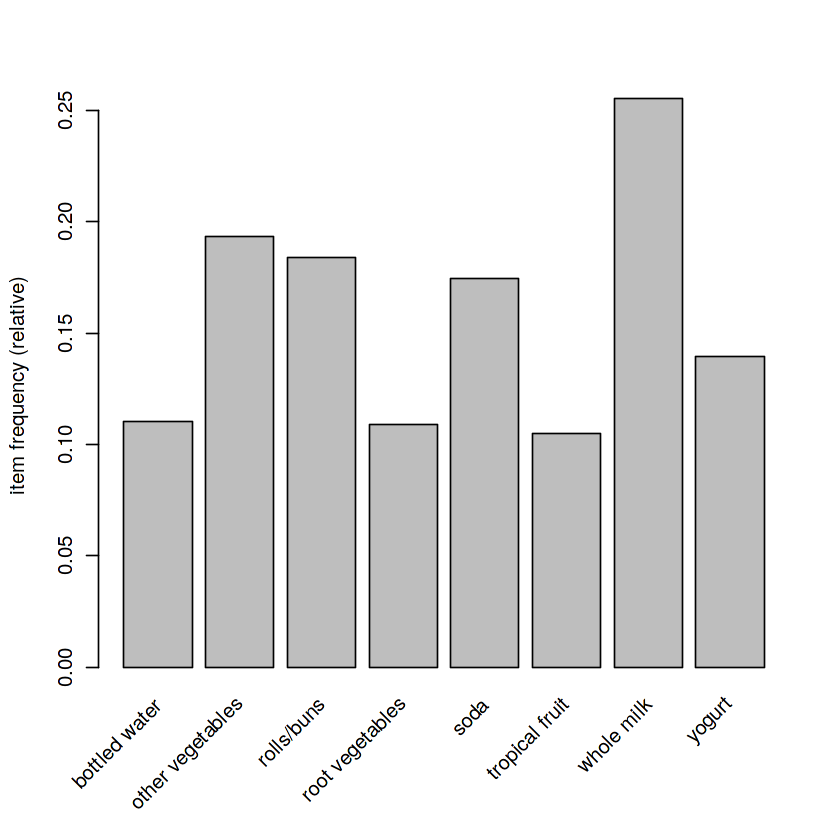

In [5]:

#fequency Table 
#I use 0.1 support because I want to see only products with  a porcentage greater to 10% of transaction 
#in other words I a want to see the best sell products
itemFrequencyPlot(abarrote,support=0.1)

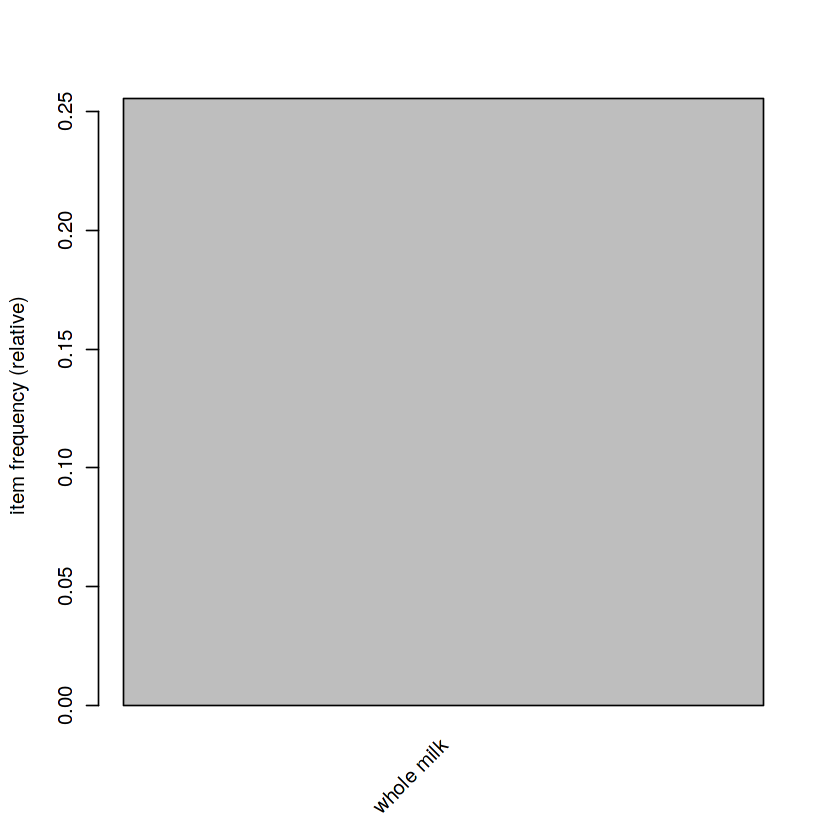

In [6]:
#now a higher parameter..0.20
itemFrequencyPlot(abarrote,support=0.20)
#just milk satisfy this condition of 0.20

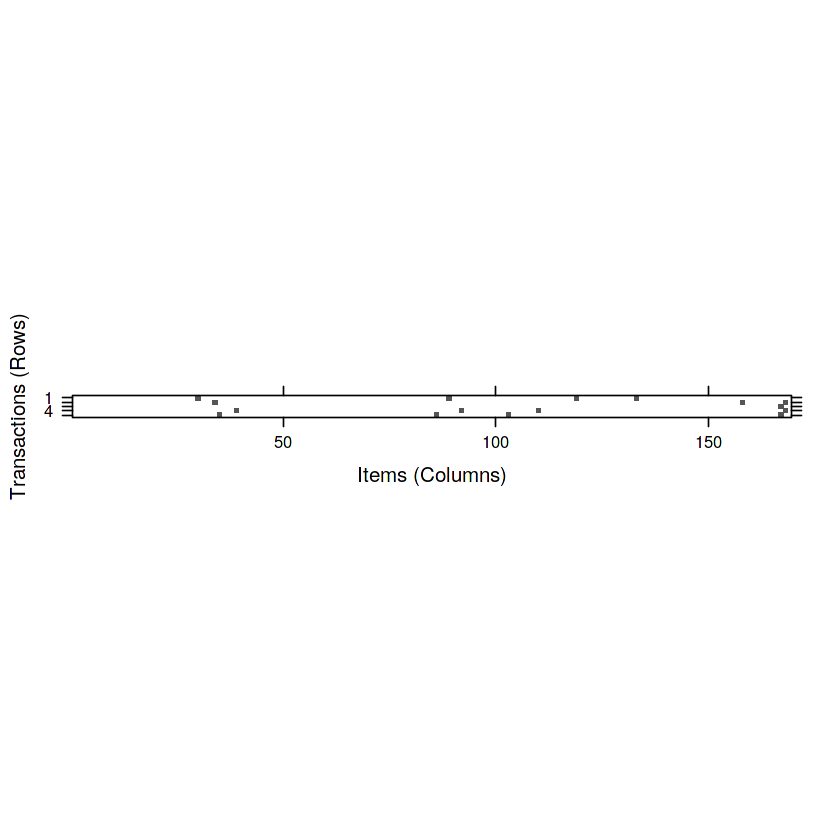

In [7]:
#My Matrix
image(abarrote[1:5])
#The resulting diagram shows a matrix with 5 rows and 169 columns, indicating the 5 transactions imaand 169 possible elements we request.

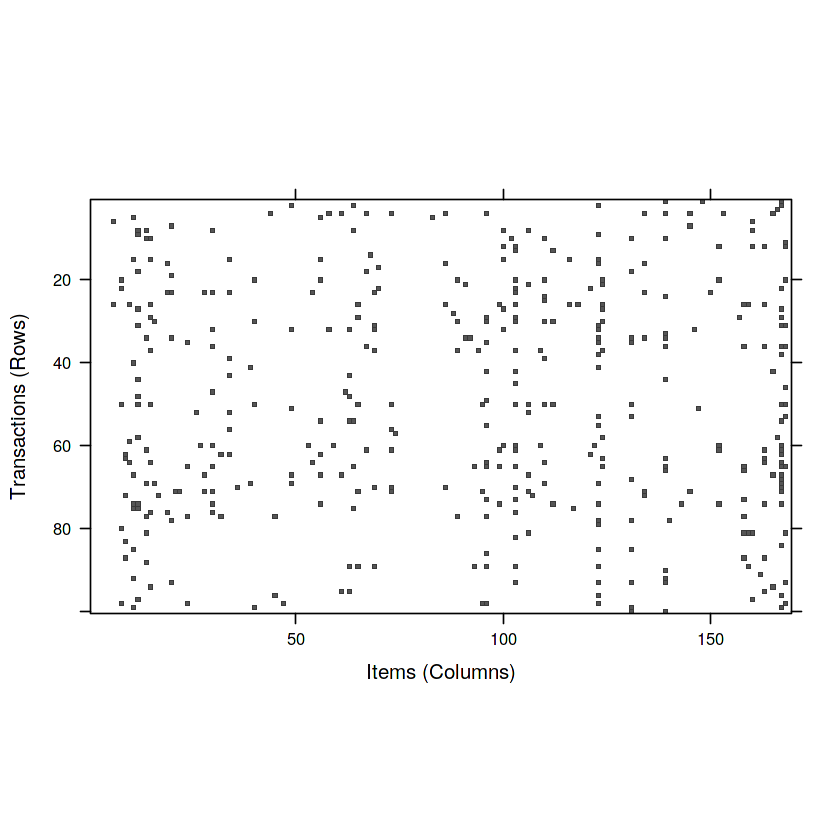

In [8]:
image(sample(abarrote,100))
#this function generated a 100x169 matriz, 100 potential consumers and 169 possible groceries products

# 4.-Modeling the recommendation System using association rules / Modelo de recomendación usando reglas de Asociación

In [9]:
# finally finishing our preparing data and our data visualization is time to build our modell
#Una vez preparados nuestros datos y terminada nuestra visualización de datos es tiempo de construir nuestro modelo usando reglas de asociación
#En esta parte usare la funcion apriori() para el modelo de asociación

In [10]:
#For example, you could argue that if an item is purchased twice a day (about 60 times in a month of data), it may be
#an interesting pattern. From there, it is possible to calculate the level of support needed to find
#only the rules that match at least as many transactions. Since 60 of 9,835 is equal to 0.006,
#we will first try to configure support there.

In [11]:
groceryrules<-apriori(data= abarrote, parameter= list(support=0.006, confidence=0.25, minlen=2 ))
groceryrules

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
       0.25    0.1    1 none FALSE            TRUE       5   0.006      2
 maxlen target  ext
     10  rules TRUE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 59 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[169 item(s), 9835 transaction(s)] done [0.01s].
sorting and recoding items ... [109 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 2 3 4 done [0.00s].
writing ... [463 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


set of 463 rules 

# 5.-evaluating model performance / Evaluamos el Desemepeño

In [12]:
summary(groceryrules)

set of 463 rules

rule length distribution (lhs + rhs):sizes
  2   3   4 
150 297  16 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  2.000   2.000   3.000   2.711   3.000   4.000 

summary of quality measures:
    support           confidence        coverage             lift       
 Min.   :0.006101   Min.   :0.2500   Min.   :0.009964   Min.   :0.9932  
 1st Qu.:0.007117   1st Qu.:0.2971   1st Qu.:0.018709   1st Qu.:1.6229  
 Median :0.008744   Median :0.3554   Median :0.024809   Median :1.9332  
 Mean   :0.011539   Mean   :0.3786   Mean   :0.032608   Mean   :2.0351  
 3rd Qu.:0.012303   3rd Qu.:0.4495   3rd Qu.:0.035892   3rd Qu.:2.3565  
 Max.   :0.074835   Max.   :0.6600   Max.   :0.255516   Max.   :3.9565  
     count      
 Min.   : 60.0  
 1st Qu.: 70.0  
 Median : 86.0  
 Mean   :113.5  
 3rd Qu.:121.0  
 Max.   :736.0  

mining info:
     data ntransactions support confidence
 abarrote          9835   0.006       0.25

In [13]:
inspect(groceryrules[1:3])

#the first line is easy to read if one person buy pot plants is probabily buy as well whole milk
#With the support of 0.007 and the confidence of 0.400, we can determine that this rule covers 0.7 percent of transactions and is correct in 40% of purchases involving potted plants

    lhs             rhs               support     confidence coverage  
[1] {pot plants} => {whole milk}      0.006914082 0.4000000  0.01728521
[2] {pasta}      => {whole milk}      0.006100661 0.4054054  0.01504830
[3] {herbs}      => {root vegetables} 0.007015760 0.4312500  0.01626843
    lift     count
[1] 1.565460 68   
[2] 1.586614 60   
[3] 3.956477 69   


In [14]:
#La primera regla se puede leer en un lenguaje sencillo, "si un cliente compra plantas en macetas, es 1.5veces probable que también compre leche entera". Con el soporte de 0.007 y la confianza de 0.400,
#podemos determinar que esta regla cubre el 0.7 por ciento de las transacciones y es correcta en el 40%
#de las compras que involucran plantas en macetas

In [15]:
# milk and plants? is something freaky? How can we make sense of this fact?

## 6.- Improve Model Performance / Mejoramos nuestro modelo

In [16]:
#ORDER THE ASSOCIATION RULES SET
#the most useful rules might be the ones have the greatest support, trust or sustenance
# las reglas más útiles podrían ser las que tengan el mayor nivel de soporte, confianza y sustento

In [17]:
inspect(sort(groceryrules, by="lift")[1:5])
#this new rules looks so interesting than others

    lhs                   rhs                      support confidence   coverage     lift count
[1] {herbs}            => {root vegetables}    0.007015760  0.4312500 0.01626843 3.956477    69
[2] {berries}          => {whipped/sour cream} 0.009049314  0.2721713 0.03324860 3.796886    89
[3] {other vegetables,                                                                         
     tropical fruit,                                                                           
     whole milk}       => {root vegetables}    0.007015760  0.4107143 0.01708185 3.768074    69
[4] {beef,                                                                                     
     other vegetables} => {root vegetables}    0.007930859  0.4020619 0.01972547 3.688692    78
[5] {other vegetables,                                                                         
     tropical fruit}   => {pip fruit}          0.009456024  0.2634561 0.03589222 3.482649    93


In [18]:
#La primera regla, con un sustento de aproximadamente 3.96, implica que las personas que compran hierbas tienen casi cuatro veces más probabilidades de comprar vegetales de raíz que el cliente típico,


In [19]:
berryrules <- subset(groceryrules, items %in% "berries")
berryrules

set of 4 rules 

In [20]:
inspect(berryrules)

    lhs          rhs                  support     confidence coverage  lift    
[1] {berries} => {whipped/sour cream} 0.009049314 0.2721713  0.0332486 3.796886
[2] {berries} => {yogurt}             0.010574479 0.3180428  0.0332486 2.279848
[3] {berries} => {other vegetables}   0.010269446 0.3088685  0.0332486 1.596280
[4] {berries} => {whole milk}         0.011794611 0.3547401  0.0332486 1.388328
    count
[1]  89  
[2] 104  
[3] 101  
[4] 116  


In [21]:
# podemos recomendar al supermercado que venda moras junto a la crema agria si un consumidor compra bayas es posible que también compre crema agria
# we can recommend the supermarket to sell berries near of sour cream if a consumer buys berries they may also buy sour cream